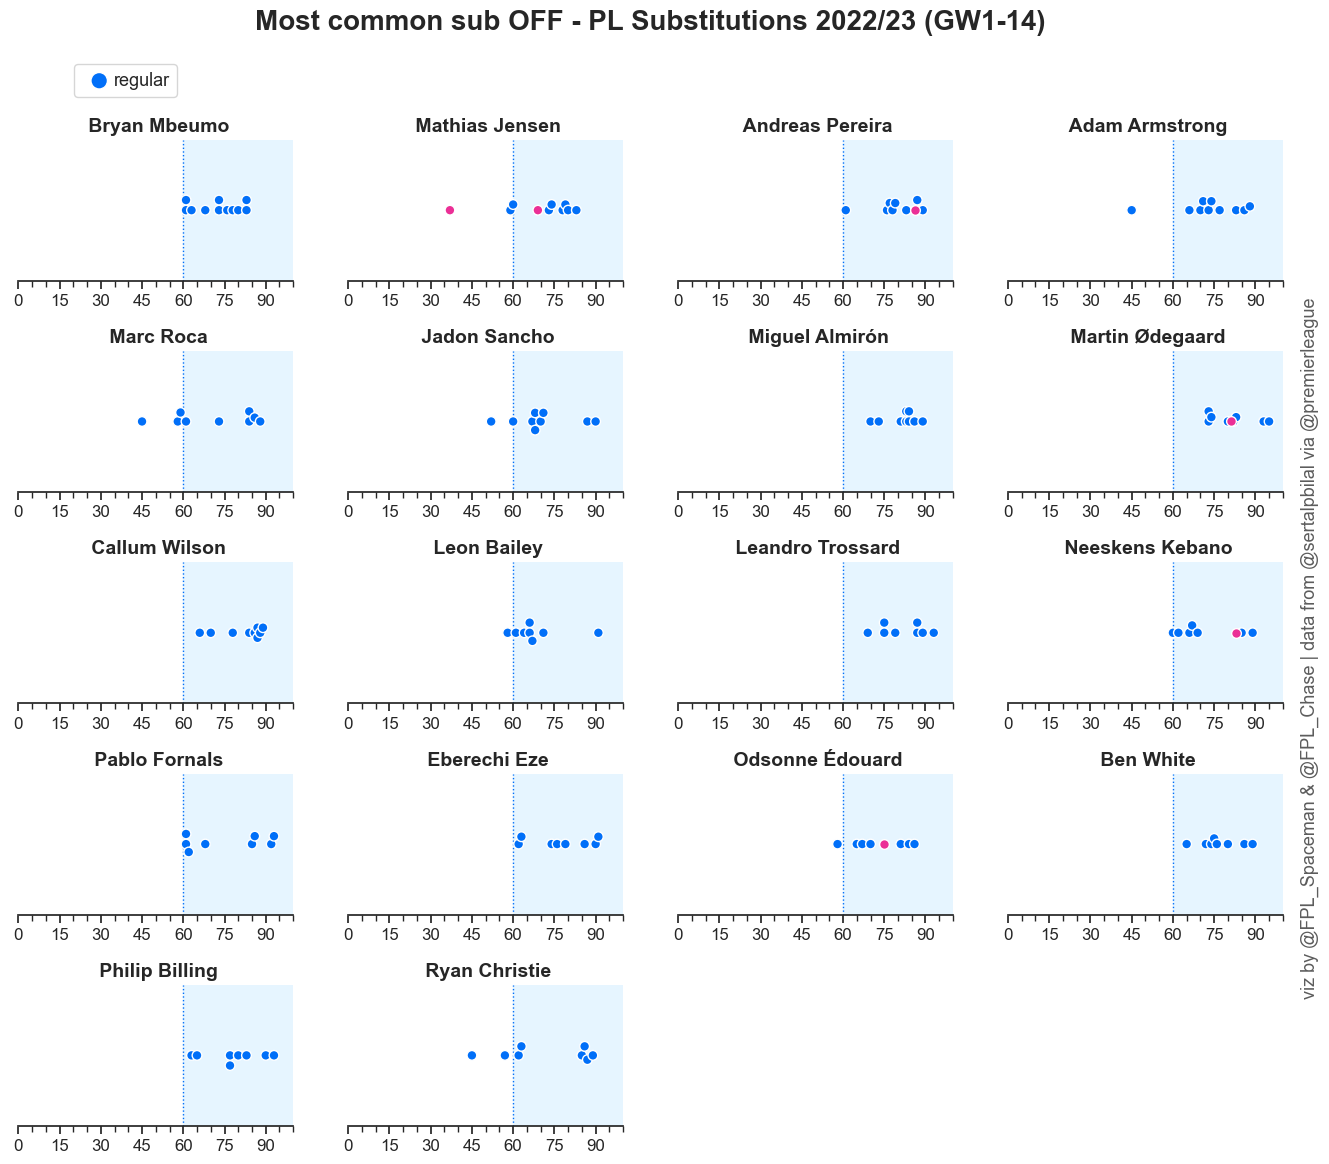

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as image
from PIL import Image

import string

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)


#THIS IS DATAFRAME PART

#columns = ["time_in_seconds", "off_name"]
#df = pd.read_csv("combined.csv", usecols=columns)

df = pd.read_csv('subs_1_to_14_off.csv')
df['sub_time'] = np.ceil(df['time_in_seconds']/60)
df.sort_values(by='off_id_freq',inplace=True,ascending=False)

#NEW COLUMN FOR INJURY SUB FLAG
def inj_sub(row):
    if 'injury' in row['text']:
        return 'injury'
    else:
        return 'regular'

df['injury_sub'] = df.apply(lambda row: inj_sub(row), axis=1)


#LAST GW SUBS IN DATAFRAME
subset=df.loc[df.groupby('off_name')['id'].idxmax()][['kickoff','off_name']]
last_gw = pd.merge(subset, df, on=["kickoff", "off_name"])
last_gw.sort_values(by='off_id_freq',inplace=True,ascending=False)

#THIS IS VIZ PART

#sns.set_style("whitegrid")
sns.set(font_scale=1.1)
sns.set_style('ticks',{"grid.linestyle": ""})

x="sub_time"
y="off_name"


g = sns.FacetGrid(df,col=y,
                  hue='injury_sub',
                  hue_order=['regular','injury'],
                  palette=['#016ff8','#eb2f96'],
                  sharex=False,
                  sharey=True,
                  col_wrap=4,
                  height=2.2,
                  aspect=1.5
                 )

g.map_dataframe(sns.swarmplot,
            x=x,
            #color='#016ff8',
            edgecolor='white', 
            linewidth=1,
            size=7)

g.set(xlim=(0, 100),xlabel=None,ylabel=None)

plt.legend(fontsize='13', title_fontsize='10',bbox_to_anchor=(0.75, 7.1, -1.34, 0.5), ncol=3,markerscale=1.7,handletextpad=-0.2)
#g.add_legend(title='Injury Sub')

#img_path="EPL_badges/"

for ax in g.axes.flat:
    ax.get_yaxis().set_visible(False)
    ax.spines['left'].set_color('white')
    ax.xaxis.set_major_locator(MultipleLocator(15))
    ax.xaxis.set_major_formatter('{x:.0f}')
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    ax.axvline(x=60, ymin=0, ymax=1, color='#016ff8', linestyle='dotted', linewidth=1)
    ax.axvspan(60, 100, color='#e6f5ff', alpha=1)
    
    #ADD IMAGE
    #logo=Image.open(f"{img_path}{str.strip(ax.get_title().split('=')[1])}.png").convert('LA')
    #ax.imshow(logo,
    #      aspect = 'auto',
    #      extent = (5,35) + (0.28,-0.28),
    #    origin='upper',
    #      alpha=0.2,
    #      zorder = 1)
    #ax.autoscale(False)
    
    #ADD TITLE
    if ax.get_title():
        ax.set_title(ax.get_title().split('=')[1],
                     fontsize='14', fontweight='bold')

plt.suptitle('Most common sub OFF - PL Substitutions 2022/23 (GW1-14)', fontsize=20, fontweight='bold', x=0.5, y=1.08)

plt.figtext(1, 0.5, "viz by @FPL_Spaceman & @FPL_Chase | data from @sertalpbilal via @premierleague", ha="center", va="center", fontsize=13, color='#5c5c5c', rotation="vertical")

plt.subplots_adjust(hspace=0.5, wspace=0.2)



#TO GENERATE HIGH RES FIGURE
#plt.savefig('EPL_Subs.png', dpi=200, bbox_inches='tight',pad_inches=0.4)
